## Questões Machine Learning - if699

### Imports

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

thetaSymbol = '\u03B8'

### Questão 1 - 19/06/2023

In [44]:
# Loading question 1 data
q1DB = pd.read_csv(os.path.join('q1DB.csv'))
q1DB.head()
q1DB.insert(0, 'x0', 1)
q1DB.rename(columns={'x': 'x1'}, inplace=True)
q1DB.head()

,x0,x1,y
0,1,2158.7,15.5
1,1,1708.3,19.0
2,1,2165.2,13.0
3,1,2053.5,18.0
4,1,1753.7,21.5


In [45]:
class Q1Model:
    def __init__(self, data, Theta, alpha, num_iters):
        self.X = data.iloc[:, 0:2]
        self.Y = data['y']
        self.Theta = pd.DataFrame(Theta)
        self.alpha = alpha
        self.num_iters = num_iters
        self.m = len(self.Y)
    
    def hipothesis(self, x):
        return self.Theta[0][0]*x['x0'] + self.Theta[0][1]*x['x1']
    
    def costFunction(self):
        h = self.hipothesis(self.X)
        #print(f'Sum(h-y) squared: {np.sum(np.square(h-self.Y))}')
        return (1/(2*self.m))*np.sum(np.square(h-self.Y))
    
    def gradientDescent(self):
        J_history = []
        J_history.append(self.costFunction())
        #print(f'Iteração 0: J({f"{thetaSymbol}"}) = {J_history.append(self.costFunction())}')
        for iter in range(self.num_iters):
            #print(f'\nIter: {iter}')
            h = self.hipothesis(self.X)
            for theta in self.Theta[0].index:
                #print(f"Theta{theta} = {self.Theta[0][theta]} => Sum(h-y) * X: {np.sum((h-self.Y)*self.X[f'x{theta}'])}\n")
                self.Theta[0][theta] = self.Theta[0][theta] - self.alpha*(1/self.m)*np.sum((h-self.Y)*self.X[f'x{theta}'])
            #print(f'Iteração {iter + 1}: J({f"{thetaSymbol}"}) = {J_history.append(self.costFunction())}')
            J_history.append(self.costFunction())
        return self.Theta, J_history


In [46]:
# Running gradient descent on the data
model1 = Q1Model(q1DB, np.array([0, 0]), 0.1, 1)

X = model1.X
Y = model1.Y
if len(X) == len(Y):
    for i in X.index:
        print(f'x0: {X["x0"][i]}, x1: {X["x1"][i]}, y: {Y[i]} => h(x): {model1.hipothesis(X.loc[i])} |::| (h(x)-y): {model1.hipothesis(X.loc[i])-Y[i]} |::| (h(x)-y)^2: {np.square(model1.hipothesis(X.loc[i])-Y[i])} |::| (h(x)-y)*x0: {(model1.hipothesis(X.loc[i])-Y[i])*X["x0"][i]} |::| (h(x)-y)*x1: {(model1.hipothesis(X.loc[i])-Y[i])*X["x1"][i]}')

    print(f'\nSum 0: {np.sum(X["x0"]*(model1.hipothesis(X)-Y))}')
    print(f'\nSum 1: {np.sum(X["x1"]*(model1.hipothesis(X)-Y))}')

print()
print(f'J({f"{thetaSymbol}"}): {model1.costFunction()}\n\n')
theta, J_history = model1.gradientDescent()
print(f'{theta}\n')
i = 0
for j in J_history:
    print(f'Iter {i} => J({f"{thetaSymbol}"}) = {j}')
    #if i % 1 == 0:
    i+=1

print()
X = model1.X
Y = model1.Y
if len(X) == len(Y):
    for i in X.index:
        print(f'x0: {X["x0"][i]}, x1: {X["x1"][i]}, y: {Y[i]} => h(x): {model1.hipothesis(X.loc[i])} |::| (h(x)-y): {model1.hipothesis(X.loc[i])-Y[i]} |::| (h(x)-y)^2: {np.square(model1.hipothesis(X.loc[i])-Y[i])} |::| (h(x)-y)*x0: {(model1.hipothesis(X.loc[i])-Y[i])*X["x0"][i]} |::| (h(x)-y)*x1: {(model1.hipothesis(X.loc[i])-Y[i])*X["x1"][i]}')

    print(f'\nSum: {np.sum(np.square(model1.hipothesis(X)-Y))}')

x0: 1, x1: 2158.7, y: 15.5 => h(x): 0.0 |::| (h(x)-y): -15.5 |::| (h(x)-y)^2: 240.25 |::| (h(x)-y)*x0: -15.5 |::| (h(x)-y)*x1: -33459.85
x0: 1, x1: 1708.3, y: 19.0 => h(x): 0.0 |::| (h(x)-y): -19.0 |::| (h(x)-y)^2: 361.0 |::| (h(x)-y)*x0: -19.0 |::| (h(x)-y)*x1: -32457.7
x0: 1, x1: 2165.2, y: 13.0 => h(x): 0.0 |::| (h(x)-y): -13.0 |::| (h(x)-y)^2: 169.0 |::| (h(x)-y)*x0: -13.0 |::| (h(x)-y)*x1: -28147.6
x0: 1, x1: 2053.5, y: 18.0 => h(x): 0.0 |::| (h(x)-y): -18.0 |::| (h(x)-y)^2: 324.0 |::| (h(x)-y)*x0: -18.0 |::| (h(x)-y)*x1: -36963.0
x0: 1, x1: 1753.7, y: 21.5 => h(x): 0.0 |::| (h(x)-y): -21.5 |::| (h(x)-y)^2: 462.25 |::| (h(x)-y)*x0: -21.5 |::| (h(x)-y)*x1: -37704.55

Sum 0: -87.0

Sum 1: -168732.7

J(θ): 155.65


          0
0     1.740
1  3374.654

Iter 0 => J(θ) = 155.65
Iter 1 => J(θ) = 22273902079218.758

x0: 1, x1: 2158.7, y: 15.5 => h(x): 7284867.329800001 |::| (h(x)-y): 7284851.829800001 |::| (h(x)-y)^2: 53069066182140.43 |::| (h(x)-y)*x0: 7284851.829800001 |::| (h(x)-y)*x1:

### Questão 2 - 21/06/2023

In [47]:
# Loading question 2 data
q2DB = pd.read_csv(os.path.join('q2DB.csv'))
#q2DB.head()
q2DB.insert(0, 'x0', 1)
q2DB.rename(columns={'x': 'x1'}, inplace=True)
q2DB.head()

,x0,x1,y
0,1,-5.01,1
1,1,-5.43,1
2,1,1.08,1
3,1,5.35,0
4,1,5.12,0


In [48]:
class Q2Model:
    '''
    Class to represent the model for question 2
    Constructor: Q2Model(data, Theta, alpha, l, num_iters)
        - data: pandas dataframe with the data
        - Theta: numpy array with the initial values for theta
        - alpha: learning rate
        - l: lambda value
        - num_iters: number of iterations
    '''
    def __init__(self, data, Theta, alpha, l, num_iters):
        self.X = data.iloc[:, 0:2]
        self.Y = data['y']
        self.Theta = pd.DataFrame(Theta)
        self.alpha = alpha
        self.l = l
        self.num_iters = num_iters
        self.m = len(self.Y)
    
    def hipothesis(self, x):
        return 1/(1+np.exp(-(self.Theta[0][0]*x['x0'] + self.Theta[0][1]*x['x1'])))
    
    def costFunction(self):
        h = self.hipothesis(self.X)
        #print(f'h(theta): {h}\n')
        return -(1/self.m*(np.sum(self.Y*np.log(h)+(1-self.Y)*np.log(1-h))))+(self.l*np.square(self.Theta[0][1]))/(2*self.m)
    
    def gradientDescent(self):
        J_history = []
        J_history.append(self.costFunction())
        for iter in range(self.num_iters):
            h = self.hipothesis(self.X)
            for j in self.Theta[0].index:
                self.Theta[0][j] = self.Theta[0][j] - self.alpha*(1/self.m)*np.sum((h-self.Y)*self.X[f'x{j}'])
            J_history.append(self.costFunction())
        return self.Theta, J_history


In [49]:
# Solving question 2 for lambda = 0
model2_1 = Q2Model(q2DB, np.array([0, 0]), 0.1, 0, 1)

X = model2_1.X
Y = model2_1.Y
if len(X) == len(Y):
    for i in X.index:
        xi = X["x1"][i]
        print(f'x1: {f"+{xi}" if xi >= 0 else xi}, y: {Y[i]} => h(x): {model2_1.hipothesis(X.loc[i])} |::| ln(h(x)): {np.log(model2_1.hipothesis(X.loc[i]))} |::| y*ln(h(x)) {Y[i]*(np.log(model2_1.hipothesis(X.loc[i])))} |::| (1-y): {1-Y[i]} |::| ln(1-h(x)): {np.log(1-(model2_1.hipothesis(X.loc[i])))} |::| (1-y)*ln(1-h(x)): {(1-Y[i])*(np.log(1-(model2_1.hipothesis(X.loc[i]))))}')

    print(f'\nSum: {np.sum(Y*np.log(model2_1.hipothesis(X))+(1-Y)*np.log(1-(model2_1.hipothesis(X))))}')

print()
print(f'J({f"{thetaSymbol}"}): {model2_1.costFunction()}\n\n')
theta, J_history = model2_1.gradientDescent()
print(f'Theta: {theta}\n')
i = 0
for j in J_history:
    print(f'Iter {i} => J({f"{thetaSymbol}"}) = {j}')
    i+=1

x1: -5.01, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: -5.43, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: +1.08, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: +5.35, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.6931471805599453
x1: +5.12, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.6931471805599453
x1: -1.34, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| l

In [50]:
# Solving question 2 for lambda = 1
model2_2 = Q2Model(q2DB, np.array([0, 0]), 0.1, 1, 1)

X = model2_2.X
Y = model2_2.Y
if len(X) == len(Y):
    for i in X.index:
        xi = X["x1"][i]
        print(f'x1: {f"+{xi}" if xi >= 0 else xi}, y: {Y[i]} => h(x): {model2_2.hipothesis(X.loc[i])} |::| ln(h(x)): {np.log(model2_2.hipothesis(X.loc[i]))} |::| y*ln(h(x)) {Y[i]*(np.log(model2_2.hipothesis(X.loc[i])))} |::| (1-y): {1-Y[i]} |::| ln(1-h(x)): {np.log(1-(model2_2.hipothesis(X.loc[i])))} |::| (1-y)*ln(1-h(x)): {(1-Y[i])*(np.log(1-(model2_2.hipothesis(X.loc[i]))))}')

    print(f'\nSum: {np.sum(Y*np.log(model2_2.hipothesis(X))+(1-Y)*np.log(1-(model2_2.hipothesis(X))))}')

print()
print(f'J({f"{thetaSymbol}"}): {model2_2.costFunction()}\n\n')
theta, J_history = model2_2.gradientDescent()
print(f'Theta: {theta}\n')
i = 0
for j in J_history:
    print(f'Iter {i} => J({f"{thetaSymbol}"}) = {j}')
    i+=1

x1: -5.01, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: -5.43, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: +1.08, y: 1 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.6931471805599453 |::| (1-y): 0 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.0
x1: +5.35, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.6931471805599453
x1: +5.12, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| ln(1-h(x)): -0.6931471805599453 |::| (1-y)*ln(1-h(x)): -0.6931471805599453
x1: -1.34, y: 0 => h(x): 0.5 |::| ln(h(x)): -0.6931471805599453 |::| y*ln(h(x)) -0.0 |::| (1-y): 1 |::| l

Iter 0 => J(θ) = 0.6931471805599452
Iter 1 => J(θ) = 0.5099057675128364
Iter 2 => J(θ) = 0.4505710302996764
Iter 3 => J(θ) = 0.4256543530840461
Iter 4 => J(θ) = 0.4131928783871115
Iter 5 => J(θ) = 0.40625715785107575
Iter 6 => J(θ) = 0.402117613493151
Iter 7 => J(θ) = 0.3995242584599888
Iter 8 => J(θ) = 0.39784134727126214
Iter 9 => J(θ) = 0.396719938852121
Iter 10 => J(θ) = 0.395957220889339


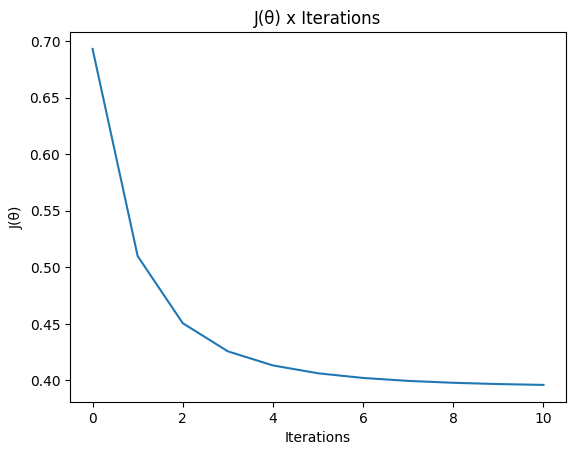


Prediction for -5.01: 1 |::| Real 1
Prediction for -5.43: 1 |::| Real 1
Prediction for +1.08: 0 |::| Real 1
Prediction for +5.35: 0 |::| Real 0
Prediction for +5.12: 0 |::| Real 0
Prediction for -1.34: 1 |::| Real 0

Error: 33.33333333333333%


In [51]:
# Extrapolando o modelo da Q2
model2_1 = Q2Model(q2DB, np.array([0, 0]), 0.1, 0, 10)

X = model2_1.X
Y = model2_1.Y
if len(X) == len(Y):
    for i in X.index:
        xi = X["x1"][i]
        #print(f'x1: {f"+{xi}" if xi >= 0 else xi}, y: {Y[i]} => h(x): {model2_1.hipothesis(X.loc[i])} |::| ln(h(x)): {np.log(model2_1.hipothesis(X.loc[i]))} |::| y*ln(h(x)) {Y[i]*(np.log(model2_1.hipothesis(X.loc[i])))} |::| (1-y): {1-Y[i]} |::| ln(1-h(x)): {np.log(1-(model2_1.hipothesis(X.loc[i])))} |::| (1-y)*ln(1-h(x)): {(1-Y[i])*(np.log(1-(model2_1.hipothesis(X.loc[i]))))}')

    #print(f'\nSum: {np.sum(Y*np.log(model2_1.hipothesis(X))+(1-Y)*np.log(1-(model2_1.hipothesis(X))))}')

#print()
#print(f'J({f"{thetaSymbol}"}): {model2_1.costFunction()}\n\n')
theta, J_history = model2_1.gradientDescent()
#print(f'Theta: {theta}\n')
i = 0
xAxis = []
for j in J_history:
    xAxis.append(i)
    print(f'Iter {i} => J({f"{thetaSymbol}"}) = {j}')
    #if i % 1 == 0:
    i+=1

if len(xAxis) == len(J_history):
    plt.plot(xAxis, J_history)
    plt.xlabel('Iterations')
    plt.ylabel('J(\u03B8)')
    plt.title('J(\u03B8) x Iterations')
    plt.show()

print()
error = 0

for x in X.index:
    xi = X["x1"][x]
    print(f'Prediction for {f"+{xi}" if xi >= 0 else xi}: {1 if model2_1.hipothesis(X.loc[x]) >= 0.5 else 0} |::| Real {Y[x]}')
    if Y[x] != (1 if model2_1.hipothesis(X.loc[x]) >= 0.5 else 0):
        error += 1

error = error/len(X)
print(f'\nError: {error*100}%')